In [197]:
import requests
import pandas as pd

client_id = 'Q7BQZZieVNOOl1yEhNYQhUpYGLaAjptGFnp49sABJlZacqPRB9' #api key
client_secret = 'NoKbh30itBqaJFx3vEZoLf8DWacWQtCWPfrD6zoa'
auth_url = 'https://api.petfinder.com/v2/oauth2/token'
auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret
}

response = requests.post(auth_url, data=auth_data)
token = response.json().get('access_token')


In [199]:
headers = {
    'Authorization': f'Bearer {token}'
}
params = {
    'location': '84606',
    'distance': 100,
    'limit': 50           
}

# Fetch multiple pages
all_animals = []
page = 1
max_pages = 8

while page <= max_pages:
    params['page'] = page
    response = requests.get('https://api.petfinder.com/v2/animals', headers=headers, params=params)

    if response.status_code == 200:
        animals_data = response.json()['animals']
        
        if not animals_data:
            break

        for animal in animals_data:
            record = {
                'organization_id': animal.get('organization_id'),
                'id': animal.get('id'),
                'species': animal.get('species'),
                'name': animal.get('name'),
                'age': animal.get('age'),
                'breed': animal.get('breeds', {}).get('primary'),
                'mixed': animal.get('breeds', {}).get('mixed'),
                'color': animal.get('colors', {}).get('primary'),
                'fixed': animal.get('attributes', {}).get('spayed_neutered'),
                'house_trained': animal.get('attributes', {}).get('house_trained'),
                'good_with_children': animal.get('environment', {}).get('children'),
                'good_with_dogs': animal.get('environment', {}).get('dogs'),
                'good_with_cats': animal.get('environment', {}).get('cats'),
                'gender': animal.get('gender'),
                'tags': animal.get('tags'),
                'distance': animal.get('distance')                
            }
            all_animals.append(record)
        
        page += 1 
    else:
        print("Error:", response.status_code, response.json())
        break

animals_df = pd.DataFrame(all_animals)
print(animals_df)


    organization_id        id species             name    age  \
0             UT202  73939517     Cat     Ace DuMoulin  Adult   
1             UT202  73939519     Cat  Nimbus DuMoulin  Adult   
2             UT202  73939518     Cat        Dash Lamb   Baby   
3             UT202  73939520     Cat  Marcus Jacobson   Baby   
4             UT202  73939522     Cat  Mazikeen Parker   Baby   
..              ...       ...     ...              ...    ...   
395           UT223  73861845     Cat       Bernadette   Baby   
396           UT223  73861839     Cat           Relish  Adult   
397           UT189  73858255     Dog           Monkey  Adult   
398            UT38  73857680     Cat            Ryder  Adult   
399            UT81  73856748     Cat         Loveseat  Adult   

                    breed  mixed                         color  fixed  \
0     Domestic Short Hair  False                  Orange / Red   True   
1     Domestic Short Hair  False                  Orange / Red   True   


In [200]:
org_ids = animals_df['organization_id'].unique()
org_names = {}

for id in org_ids:
    org_response = requests.get(f'https://api.petfinder.com/v2/organizations/{id}', headers=headers)
    if org_response.status_code == 200:
        org_data = org_response.json().get('organization', {})
        org_names[id] = org_data.get('name')
    else:
        print(f"Error fetching organization {id}")


Error fetching organization UT33


In [201]:
animals_df['organization_name'] = animals_df['organization_id'].map(org_names)
animals_df['organization_name'].unique()

array(['Celestial Zoo Pet Rescue', 'Rescue Rovers Dog Adoptions',
       'Wasatch Wanderers', 'Salt Lake County Animal Services',
       'Roosevelt Animal Shelter', 'Furever Friends Animal Oasis',
       'Desiderata Rescue', 'The Golden Bark Foundation',
       'Community Animal Welfare Society (CAWS)', 'Herding Haven',
       'Davis County Animal Services', 'Humane Society of Utah',
       'Humane Society of Northern Utah', 'Throw a Dog a Bone Dog Rescue',
       'Kitty CrusAIDe', 'Hearts 4 Paws',
       'Utah Animal Advocacy Foundation', 'Outreach Pawsabilities',
       'Best Friends Animal Society-Utah', 'Pet Samaritan Fund',
       'Happy Tails at Pegasus', 'Jason Heigl Foundation',
       'Utah Animal Adoption Center', 'Carbon Cat Rescue',
       'Ruff Patch Rescue', 'Castle Valley Animal Rescue',
       'Mountain Mama Pyrs and Pups', 'Purrfect Pawprints', nan,
       'Utah Valley Animal Rescue, Inc.', 'Beaumont Pets Alive',
       'Friends of Community-Cats Rescue', 'Sugar Face F

In [204]:
animals_df

,organization_id,id,species,name,age,breed,mixed,color,fixed,house_trained,good_with_children,good_with_dogs,good_with_cats,gender,tags,distance,organization_name
0,UT202,73939517,Cat,Ace DuMoulin,Adult,Domestic Short Hair,False,Orange / Red,True,False,None,None,True,Male,"[Good with cats, Good with children]",19.4094,Celestial Zoo Pet Rescue
1,UT202,73939519,Cat,Nimbus DuMoulin,Adult,Domestic Short Hair,False,Orange / Red,True,False,None,True,True,Female,"[Good with cats, Good with dogs]",19.4094,Celestial Zoo Pet Rescue
2,UT202,73939518,Cat,Dash Lamb,Baby,Domestic Medium Hair,False,Gray / Blue / Silver,False,False,None,True,True,Male,"[Good with cats, Good with children, Good with...",19.4094,Celestial Zoo Pet Rescue
3,UT202,73939520,Cat,Marcus Jacobson,Baby,Domestic Long Hair,False,Black,False,False,None,True,True,Male,"[Good with cats, Good with children, Good with...",19.4094,Celestial Zoo Pet Rescue
4,UT202,73939522,Cat,Mazikeen Parker,Baby,Siamese,True,White,False,False,None,True,True,Female,"[Good with cats, Good with children, Good with...",19.4094,Celestial Zoo Pet Rescue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,UT223,73861845,Cat,Bernadette,Baby,Domestic Short Hair,False,Cream / Ivory,True,True,True,True,True,Female,"[Affectionate, Athletic, Brave, Curious, Frien...",29.2472,Kitty CrusAIDe
396,UT223,73861839,Cat,Relish,Adult,Domestic Long Hair,False,Tabby (Gray / Blue / Silver),True,True,None,False,False,Male,"[Affectionate, Friendly, Independent, Playful,...",29.2472,Kitty CrusAIDe
397,UT189,73858255,Dog,Monkey,Adult,Border Collie,False,Black,True,False,None,None,None,Male,[],8.2912,"Utah Valley Animal Rescue, Inc."
398,UT38,73857680,Cat,Ryder,Adult,Domestic Short Hair,False,Black & White / Tuxedo,False,False,None,None,None,Male,[],32.9329,Pet Samaritan Fund


In [ ]:
#EDA
# Filter out non UT that stayed for some reason
animals_df = animals_df[animals_df['organization_id'].str.startswith('UT')]


,organization_id,id,species,name,age,breed,mixed,color,fixed,house_trained,good_with_children,good_with_dogs,good_with_cats,gender,tags,distance,organization_name
0,UT202,73939517,Cat,Ace DuMoulin,Adult,Domestic Short Hair,False,Orange / Red,True,False,None,None,True,Male,"[Good with cats, Good with children]",19.4094,Celestial Zoo Pet Rescue
1,UT202,73939519,Cat,Nimbus DuMoulin,Adult,Domestic Short Hair,False,Orange / Red,True,False,None,True,True,Female,"[Good with cats, Good with dogs]",19.4094,Celestial Zoo Pet Rescue
2,UT202,73939518,Cat,Dash Lamb,Baby,Domestic Medium Hair,False,Gray / Blue / Silver,False,False,None,True,True,Male,"[Good with cats, Good with children, Good with...",19.4094,Celestial Zoo Pet Rescue
3,UT202,73939520,Cat,Marcus Jacobson,Baby,Domestic Long Hair,False,Black,False,False,None,True,True,Male,"[Good with cats, Good with children, Good with...",19.4094,Celestial Zoo Pet Rescue
4,UT202,73939522,Cat,Mazikeen Parker,Baby,Siamese,True,White,False,False,None,True,True,Female,"[Good with cats, Good with children, Good with...",19.4094,Celestial Zoo Pet Rescue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,UT223,73861845,Cat,Bernadette,Baby,Domestic Short Hair,False,Cream / Ivory,True,True,True,True,True,Female,"[Affectionate, Athletic, Brave, Curious, Frien...",29.2472,Kitty CrusAIDe
396,UT223,73861839,Cat,Relish,Adult,Domestic Long Hair,False,Tabby (Gray / Blue / Silver),True,True,None,False,False,Male,"[Affectionate, Friendly, Independent, Playful,...",29.2472,Kitty CrusAIDe
397,UT189,73858255,Dog,Monkey,Adult,Border Collie,False,Black,True,False,None,None,None,Male,[],8.2912,"Utah Valley Animal Rescue, Inc."
398,UT38,73857680,Cat,Ryder,Adult,Domestic Short Hair,False,Black & White / Tuxedo,False,False,None,None,None,Male,[],32.9329,Pet Samaritan Fund


Text(0, 0.5, 'Count of Animals')

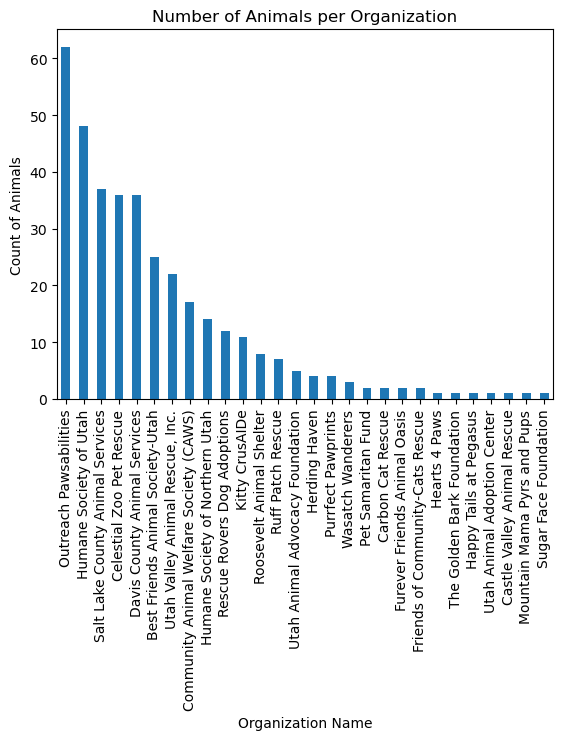

In [214]:
#EDA
import matplotlib.pyplot as plt

count_by_org = animals_df['organization_name'].value_counts()
count_by_org.plot(kind = 'bar')
plt.title("Number of Animals per Organization")
plt.xlabel("Organization Name")
plt.ylabel("Count of Animals")


In [ ]:
# Question of Interest
# Which pet organization near me has a higher proportion of cats in shelter than dogs?

